In [36]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 

In [37]:
dir_path = os.path.abspath('')
training_folder = os.path.join(dir_path,'Training')
validation_folder = os.path.join(dir_path,'Validation')

training_male_folder = os.path.join(training_folder,'male')
training_female_folder = os.path.join(training_folder,'female')

validation_male_folder = os.path.join(validation_folder,'male')
validation_female_folder = os.path.join(validation_folder,'female')

In [38]:
print('Number of training examples:',len(os.listdir(training_female_folder))+len(os.listdir(training_male_folder)))
print('Number of validation examples:',len(os.listdir(validation_female_folder))+len(os.listdir(validation_male_folder)))

Number of training examples: 47009
Number of validation examples: 11649


In [39]:
train_male_fname = os.listdir(training_male_folder)
train_female_fname = os.listdir(training_female_folder)

print(train_male_fname[:10])
print(train_female_fname[:10])

['090544.jpg', '090545.jpg', '090548.jpg', '090550.jpg', '090553.jpg', '090557.jpg', '090558.jpg', '090559.jpg', '090563.jpg', '090567.jpg']
['131422.jpg', '131423.jpg', '131425.jpg', '131427.jpg', '131428.jpg', '131429.jpg', '131432.jpg', '131433.jpg', '131435.jpg', '131437.jpg']


In [40]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

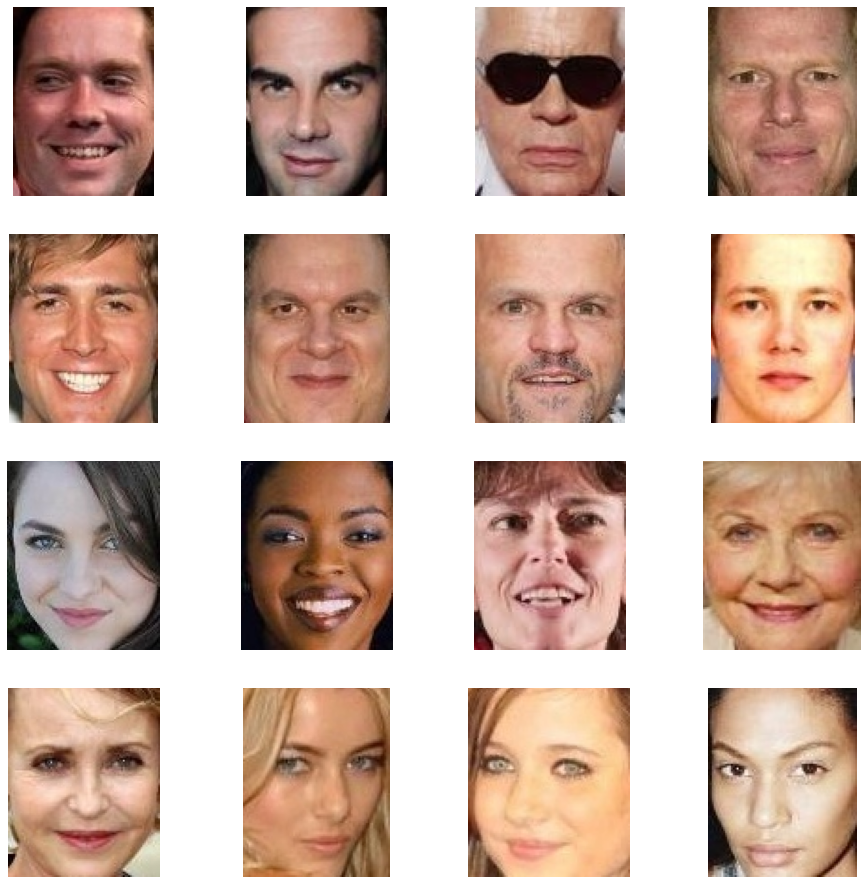

In [41]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_male_pix = [os.path.join(training_male_folder, fname) 
                for fname in train_male_fname[ pic_index-8:pic_index] 
               ]

next_female_pix = [os.path.join(training_female_folder, fname) 
                for fname in train_female_fname[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_male_pix+next_female_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [42]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        training_folder,  
        target_size=(110, 150),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_folder,
        target_size=(110, 150),  
        batch_size=32,
        class_mode='binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [43]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from keras import regularizers

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(110,150,3),kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D(2,2),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 108, 148, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 74, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 36, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 17, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 15, 128)      

In [45]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,   
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 56s 563ms/step - loss: 0.6293 - accuracy: 0.6316 - val_loss: 0.4918 - val_accuracy: 0.8350
Epoch 2/30
100/100 [==============================] - 59s 588ms/step - loss: 0.4234 - accuracy: 0.8225 - val_loss: 0.3418 - val_accuracy: 0.8544
Epoch 3/30
100/100 [==============================] - 73s 728ms/step - loss: 0.3780 - accuracy: 0.8398 - val_loss: 0.3115 - val_accuracy: 0.8800
Epoch 4/30
100/100 [==============================] - 56s 564ms/step - loss: 0.3427 - accuracy: 0.8612 - val_loss: 0.3162 - val_accuracy: 0.8750
Epoch 5/30
100/100 [==============================] - 58s 584ms/step - loss: 0.3169 - accuracy: 0.8748 - val_loss: 0.2450 - val_accuracy: 0.9119
Epoch 6/30
100/100 [==============================] - 76s 759ms/step - loss: 0.2997 - accuracy: 0.8838 - val_loss: 0.2350 - val_accuracy: 0.9137
Epoch 7/30
100/100 [==============================] - 80s 798ms/step - loss: 0.2604 - accuracy: 0.8991 - val_loss: 0.1929 - val_ac

In [47]:
model.save('gc.h5')

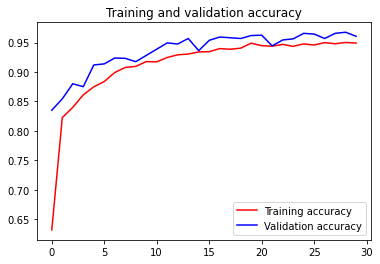

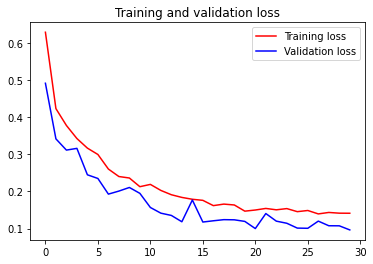

<Figure size 432x288 with 0 Axes>

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()